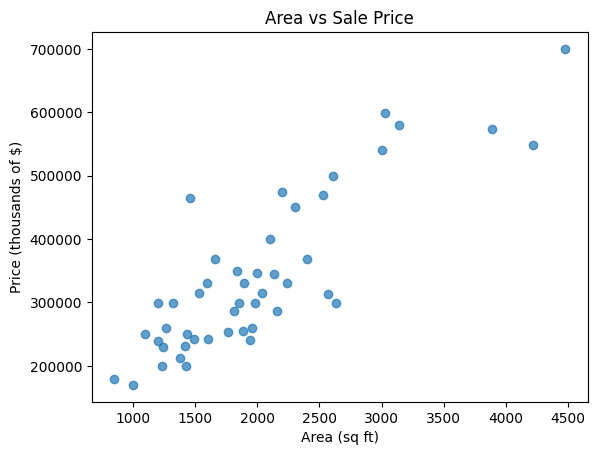

Correlation coefficient: 0.85
Linear Model: Sale Price = 71270.49 + 134.53 * Area
t-statistic: 11.06, critical value: 2.01
Reject the null hypothesis: Price depends on Area.
Prediction interval for a house with area 2100 sq ft: [353740.53, 353806.67] (99% confidence)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t
from sklearn.linear_model import LinearRegression

# Loading ex1data2.txt file
data = pd.read_csv('ex1data2.txt', header=None, names=['Area', 'Number of Bedrooms', 'Sale Price'])
x1 = data['Area'] # x1: Independent variable (area in ft²)
y = data['Sale Price'] #y: Dependent variable (price in thousands of dollars)

#Part1
# Scatter plot
plt.scatter(x1, y, alpha=0.7)
plt.title('Area vs Sale Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (thousands of $)')
plt.show()

# Calculating correlation coefficient
correlation = np.corrcoef(x1, y)[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')
# The correlation coefficient is 0.85, indicating a strong positive linear relationship

#Part2: Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x1, y)
print(f'Linear Model: Sale Price = {intercept:.2f} + {slope:.2f} * Area')
# The model predicts a base price of $71.27k and an increase of $134.53k per square foot.
# Confirming that the suitability of a linear model for prediction

# Part 3: Hypothesis testing for β1 = 0
# Hypotheses for testing the relationship between area and price:
# H0: β1 = 0 (null hypothesis, no relationship between area and price)
# H1: β1 ≠ 0 (alternative hypothesis, relationship exists)
n = len(x1)
t_statistic = slope / std_err
df = n - 2
critical_value = t.ppf(1 - 0.025, df)
# two-tailed t-test at a 95% confidence level,α = 0.05, and the critical value is calculated for α/2 = 0.025 in each tail
print(f't-statistic: {t_statistic:.2f}, critical value: {critical_value:.2f}')

if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis: Price depends on Area.")
else:
    print("Fail to reject the null hypothesis: Price does not depend on Area.")
# Since |t| = 11.06 > 2.01, we reject H0.

# Part4: Prediction interval for x0 = 2100
x0 = 2100
mean_x = np.mean(x1)
Sxx = np.sum((x1 - mean_x)**2)
predicted_price = intercept + slope * x0

# Standard error of prediction
SE_pred = std_err * np.sqrt(1 + 1/n + ((x0 - mean_x)**2 / Sxx))
t_critical = t.ppf(1 - 0.005, df)
# two-tailed t-test at a 99% confidence level,α = 0.01, and the critical value is calculated for α/2 = 0.005 in each tail

lower_bound = predicted_price - t_critical * SE_pred
upper_bound = predicted_price + t_critical * SE_pred

print(f'Prediction interval for a house with area 2100 sq ft: '
      f'[{lower_bound:.2f}, {upper_bound:.2f}] (99% confidence)')
# The 99% prediction interval [$353,740.53, $353,806.67] shows high confidence.


